### Ćwiczenie 9
Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą
1. liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski
rozmiaru 3 × 3.
2. nieliniowego filtra medianowego
3. filtrów minimum i maksimum.

In [1]:
import matplotlib.pyplot as plt
import cv2  
import skimage.morphology as morph
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

In [2]:
# Załadowanie pliku .tiff
img_a = cv2.imread("src/cboard_pepper_only.tif") 
img_b = cv2.imread("src/cboard_salt_only.tif") 
img_c = cv2.imread("src/cboard_salt_pepper.tif") 

### Zadanie 1
Filtr uśredniający z kwadratową maską 3x3

In [3]:
def meanFilter(img,square_mask):
    img = rgb2gray(img)
    img = img_as_ubyte(img)
    plt.subplot(2,3,2)
    mean_img = rank.mean(img,square_mask)    
    plt.imshow(mean_img, cmap='gray')
    plt.title("Filtr uśredniający")

### Zadanie 2
Nieliniowy filtr medianowy

In [4]:
def mediFilter(img,square_mask):
    img = rgb2gray(img)
    img = img_as_ubyte(img)
    plt.subplot(2,3,3)
    medi_img = rank.median(img,square_mask)
    plt.imshow(medi_img, cmap='gray')
    plt.title("Filtr medianowy")

### Zadanie 3
Filtry minimum i maximum

In [5]:
def minMaxFilter(img,square_mask):
    img = rgb2gray(img)
    img = img_as_ubyte(img)
    plt.subplot(2,3,4)
    min_img = rank.minimum(img,square_mask)
    plt.imshow(min_img, cmap='gray')
    plt.title("Filtr min")
    
    plt.subplot(2,3,5)
    max_img = rank.maximum(img,square_mask)
    plt.imshow(max_img, cmap='gray')
    plt.title("Filtr maks")

    plt.subplot(2,3,6)
    minMax_img = rank.maximum(min_img,square_mask)
    plt.imshow(minMax_img, cmap='gray')
    plt.title("Filtr min-maks")

Obrazy wynikowwe dla maski 1x1:


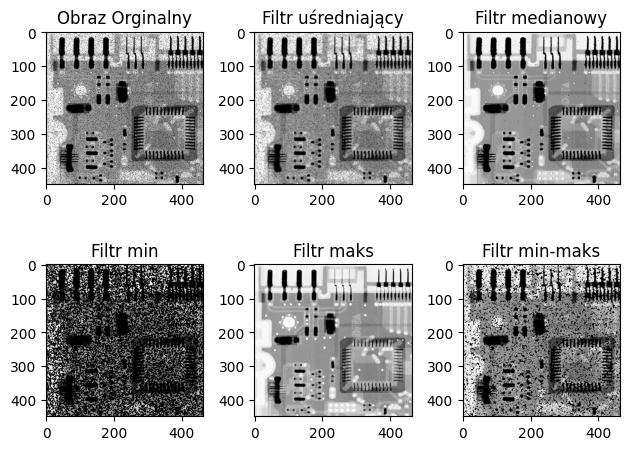

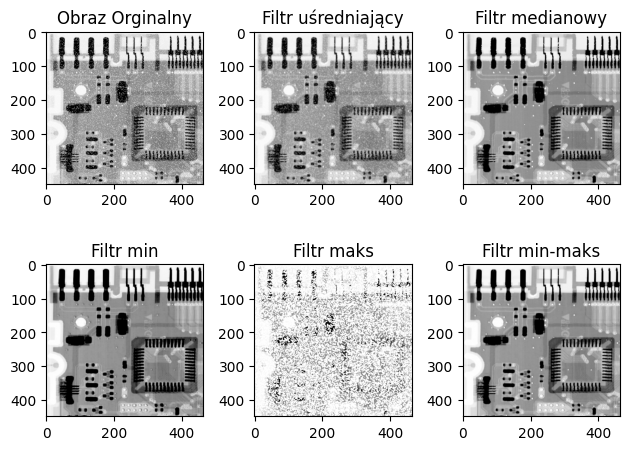

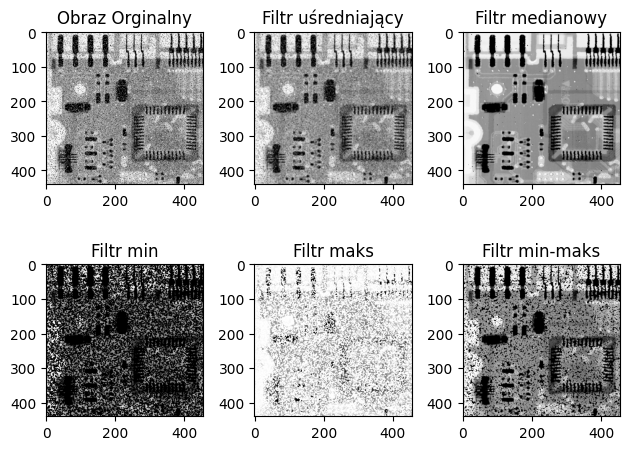

Obrazy wynikowwe dla maski 2x2:


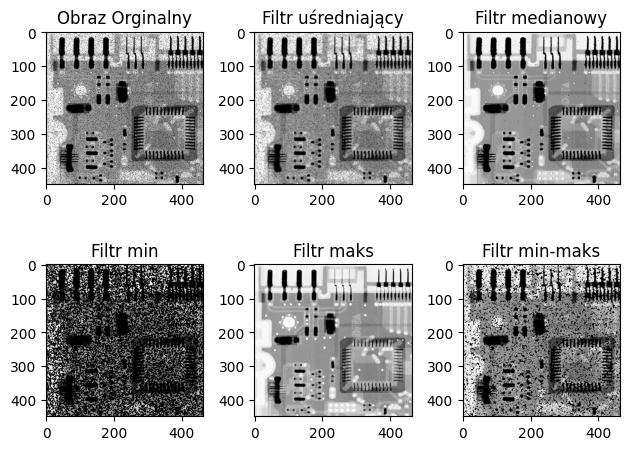

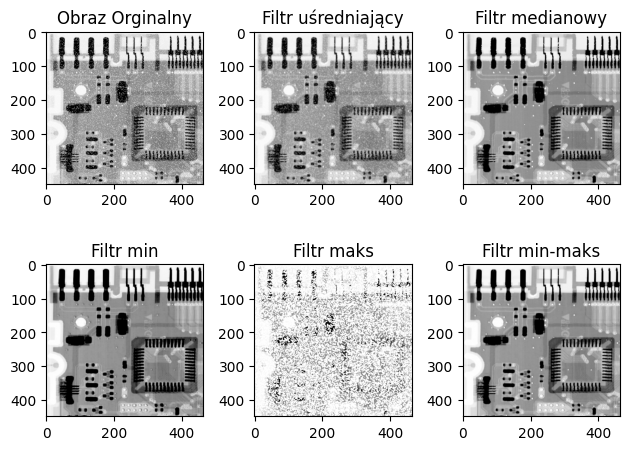

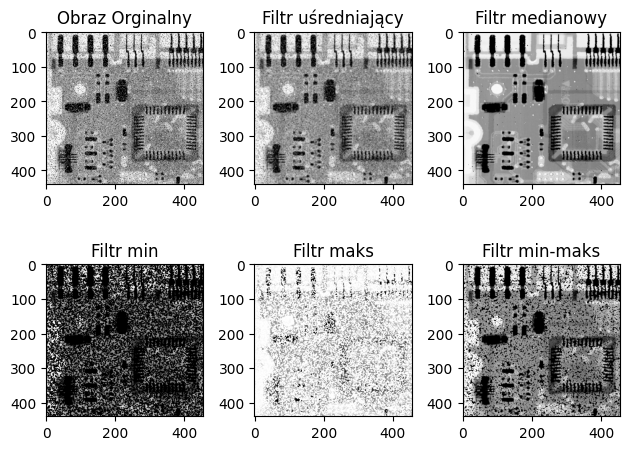

Obrazy wynikowwe dla maski 3x3:


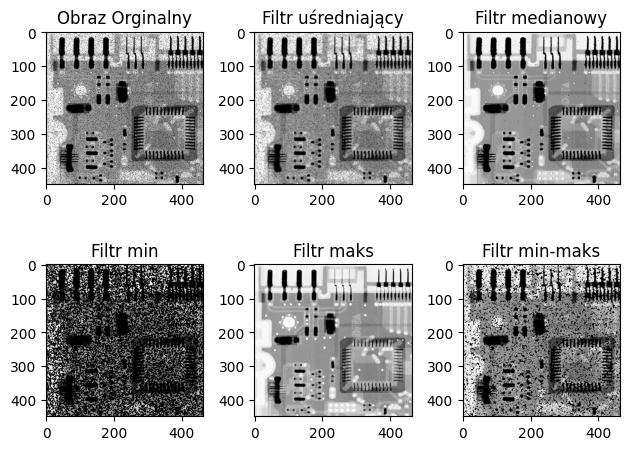

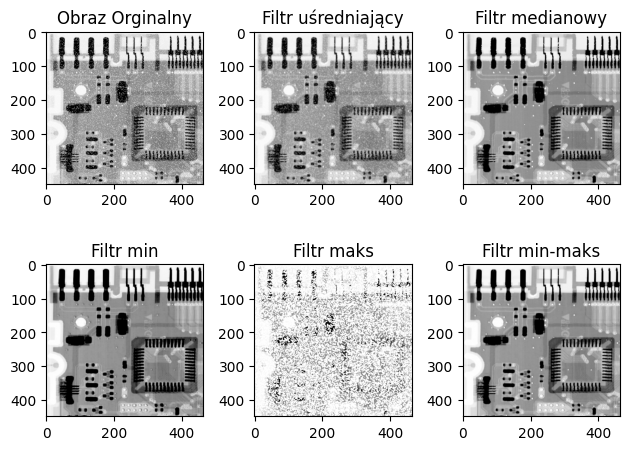

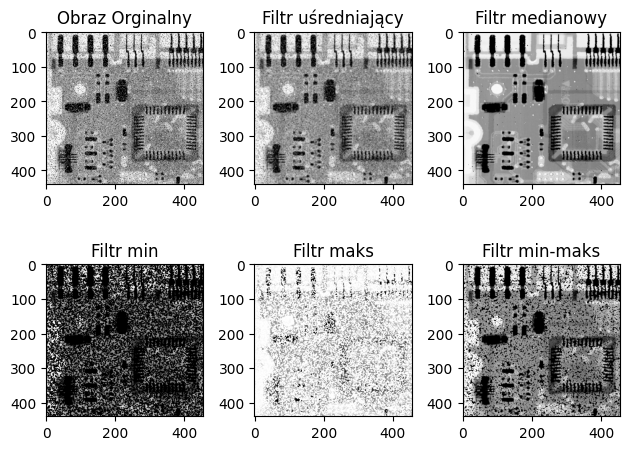

In [10]:


def display(img,square_mask):
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Obraz Orginalny")
    meanFilter(img,square_mask)
    mediFilter(img,square_mask)
    minMaxFilter(img,square_mask)
    plt.tight_layout()
    plt.show()

for i in range(3):
    square_mask = morph.footprint_rectangle((3,3))
    print("Obrazy wynikowwe dla maski {}x{}:".format(i+1, i+1))
    display(img_a,square_mask) #pepper
    display(img_b,square_mask) #salt
    display(img_c,square_mask) #salt and pepper
    square_mask = (square_mask[0] + 1, square_mask[1] + 1)


W badaniach porównano skuteczność filtrów uśredniającego, medianowego, minimalnego, maksymalnego oraz min-maks na obrazach z szumem typu "pieprz", "sól" oraz "sól i pieprz" dla masek o rozmiarach od 3×3 do 5×5.<br>
- Zastosowane filtry i efekty
    - Filtr uśredniający (mean):
Skutecznie wygładza szum, jednak powoduje rozmycie krawędzi i utratę szczegółów. Im większa maska, tym silniejsze rozmycie obrazu. Najlepiej sprawdza się przy słabym szumie, ale nie radzi sobie z pojedynczymi impulsami szumu typu "sól" lub "pieprz".

    - Filtr medianowy (median):
Najlepiej usuwa szum impulsowy ("sól", "pieprz", "sól i pieprz"), zachowując przy tym ostrość krawędzi. Nawet przy większych maskach skutecznie eliminuje zakłócenia bez nadmiernego rozmycia obrazu. Jest rekomendowany do usuwania szumu impulsowego.

    - Filtr minimalny (min):
Usuwa głównie szum typu "sól" (białe piksele), ale może prowadzić do przyciemnienia obrazu i utraty detali. Przy większych maskach efekt ciemnienia jest silniejszy.

    - Filtr maksymalny (max):
Usuwa głównie szum typu "pieprz" (czarne piksele), ale może prowadzić do rozjaśnienia obrazu. Zwiększenie maski potęguje ten efekt.

    - Filtr min-maks:
Kombinacja filtrów min i max pozwala na usunięcie obu typów szumu ("sól i pieprz"), jednak kosztem utraty kontrastu i szczegółów, zwłaszcza przy większych maskach.

- Wnioski z badań dla masek 3×3, 4×4, 5×5
    - Maska 3×3:
Najlepszy kompromis między usuwaniem szumu a zachowaniem szczegółów. Filtr medianowy skutecznie usuwa szum impulsowy, a efekt rozmycia jest minimalny.

    - Maska 4×4 i 5×5:
Skuteczność usuwania szumu rośnie, ale jednocześnie rośnie rozmycie i utrata detali. Filtr medianowy nadal radzi sobie najlepiej, natomiast filtry uśredniający, min i max powodują coraz większą degradację jakości obrazu.